In [1]:
from poenta.jitted import R_matrix,large_squeezing
import numpy as np
import matplotlib.pyplot as plt

In [164]:
from scipy.special import factorial as fac
def coherent_state(alpha,cutoff):
    state = np.zeros(cutoff, dtype=np.complex128)
    for m in range(cutoff):
        state[m] = np.exp(-np.abs(alpha)**2/2)*alpha**m/np.sqrt(fac(m))
    return state

In [8]:
gamma = 0
phi = 0
old_state = np.hstack([np.random.normal(size=100)+np.random.normal(size=100)*1j, np.zeros(3000, dtype=np.complex128)])
old_state /= np.linalg.norm(old_state)
print(len(old_state))

3100


In [14]:
errors = []
for j in range(15):
    z = 5 + j*0.5 + 0.4j
    squeezing_real = R_matrix(gamma, phi, z, 3100, old_state)[:,0]
    squeezing_approxi = large_squeezing(gamma, phi, z, 3100, old_state)[:,0]
    norm_approxi = np.linalg.norm(squeezing_approxi)
    print("norm",norm_approxi)
    error = np.sqrt(np.sum(np.abs(squeezing_real - squeezing_approxi)**2))
    errors.append(error)


norm 0.24021534221785826
norm 0.1631593619669168
norm 0.10767602572043
norm 0.06972555598571854
norm 0.04436783718310126
norm 0.027650438897062573
norm 0.01674854196934268
norm 0.009722428438588308
norm 0.005261830241198232
norm 0.002489917404888584
norm 0.0008340052037608577
norm 0.00029729377764225724
norm 0.000735775659802758
norm 0.0009667495002145688
norm 0.0010358517301127267


Text(0, 0.5, 'Euclidean Distance')

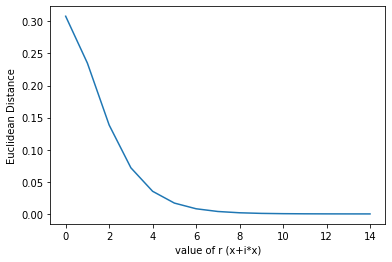

In [15]:
plt.plot(errors)
plt.xlabel("value of r (x+i*x)")
plt.ylabel("Euclidean Distance")
